### Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime as dt
import re

#### Functions

In [ ]:
def http_request_type(request_string):
    '''http_request_type(request_string) request_string is a text value. 
    Function is used for extracting request type from request column as GET or HEAD'''
    pattern = r"^(\w+)\s"
    match = re.match(pattern, request_string)
    result = match.group(1)
    return result

In [ ]:
def product_extract(request_string):
    '''http_request_type(request_string) request_string is a text value. 
    Function is used for extracting product name from request column.'''
    pattern = r"\w+\s/downloads/(.*?)\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(1)    
    return result

In [ ]:
def brand_extract(request_string):
    '''http_request_type(request_string) request_string is a text value. 
    Function is used for extracting product brand name from request column.'''
    pattern = r"\w+\s/downloads/(\w+)-(.*?)\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(1)    
    return result

In [ ]:
def model_extract(request_string):
    '''http_request_type(request_string) request_string is a text value. 
    Function is used for extracting product model from request column.'''
    pattern = r"\w+\s/downloads/(\w+)-(.*?)\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(2)    
    return result

In [ ]:
def product_year_extract(request_string):
    '''http_request_type(request_string) request_string is a text value. 
    Function is used for extracting product year from request column.'''
    pattern = r"\w+\s/downloads/(\w+)-(.*?)-?(\d{4})?\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(3)
    if result:
        result = result
    else:
        result = "empty"    
    return result

#### Read Data And Convert Time

In [2]:
df = pd.read_json(r"C:\Users\Ertuğrul\Downloads\updated_dataset.json", lines=True)
df.sample(30)

,time,remote_ip,remote_user,request,response,bytes,referrer,agent
13666,22/May/2015:02:05:16 +0000,80.91.33.133,-,GET /downloads/bridgestone-potenza-sport--rft-...,404,324,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16)
44894,02/Jun/2015:00:06:39 +0000,84.208.15.12,-,GET /downloads/bridgestone-potenza-sport--rft-...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
35405,29/May/2015:16:05:01 +0000,79.136.114.202,-,GET /downloads/bridgestone-weather-control-a00...,404,334,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.22)
41995,31/May/2015:23:05:24 +0000,192.73.244.113,-,GET /downloads/bridgestone-turanza-er300-rft-2...,404,336,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
27962,27/May/2015:01:05:12 +0000,5.9.121.211,-,GET /downloads/kumho-solus-ha31-185-65-r15-88h...,200,2508,-,Debian APT-HTTP/1.3 (1.0.1ubuntu2)
3135,18/May/2015:10:05:43 +0000,5.9.143.77,-,GET /downloads/hankook-kinergy-4s-h740-275-45-...,404,337,-,Debian APT-HTTP/1.3 (0.9.7.9)
11959,21/May/2015:12:05:23 +0000,65.39.197.164,-,GET /downloads/bridgestone-potenza-sport--rft-...,404,336,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16)
21160,24/May/2015:16:05:01 +0000,144.76.238.251,-,GET /downloads/bridgestone-turanza-er300-275-4...,404,333,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
26691,26/May/2015:15:05:24 +0000,204.77.168.241,-,GET /downloads/pirelli-scorpion-sealinside-ao-...,404,325,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.7)
424,17/May/2015:11:05:36 +0000,195.210.47.239,-,GET /downloads/pirelli-cinturato-p7-all-season...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51462 entries, 0 to 51461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time         51462 non-null  object
 1   remote_ip    51462 non-null  object
 2   remote_user  51462 non-null  object
 3   request      51462 non-null  object
 4   response     51462 non-null  int64 
 5   bytes        51462 non-null  int64 
 6   referrer     51462 non-null  object
 7   agent        51462 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [4]:
df['time'] = pd.to_datetime(df['time'], format='%d/%b/%Y:%H:%M:%S %z')  # object datetime convert
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51462 entries, 0 to 51461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   time         51462 non-null  datetime64[ns, UTC]
 1   remote_ip    51462 non-null  object             
 2   remote_user  51462 non-null  object             
 3   request      51462 non-null  object             
 4   response     51462 non-null  int64              
 5   bytes        51462 non-null  int64              
 6   referrer     51462 non-null  object             
 7   agent        51462 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 3.1+ MB


In [5]:
#df['time'] = df['time'].apply(lambda d: pd.to_datetime(d).date())  # remove time
df['time'] = df['time'].dt.tz_localize(None)  # remove timezone because of excel that is not support
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["day"] = df["time"].dt.day
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute
df

,time,remote_ip,remote_user,request,response,bytes,referrer,agent,year,month,day,hour,minute
0,2015-05-17 08:05:32,93.180.71.3,-,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
1,2015-05-17 08:05:23,93.180.71.3,-,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
2,2015-05-17 08:05:24,80.91.33.133,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17),2015,5,17,8,5
3,2015-05-17 08:05:34,217.168.17.5,-,GET /downloads/bridgestone-turanza-er300-rft-2...,200,490,-,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
4,2015-05-17 08:05:09,217.168.17.5,-,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,490,-,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,404,339,-,Debian APT-HTTP/1.3 (0.8.10.3),2015,6,4,7,6
51458,2015-06-04 07:06:05,54.186.10.255,-,GET /downloads/michelin-alpin-5-zp-n0-225-45-r...,200,2582,-,urlgrabber/3.9.1 yum/3.4.3,2015,6,4,7,6
51459,2015-06-04 07:06:16,80.91.33.133,-,GET /downloads/pirelli-scorpion-sealinside-ao-...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16),2015,6,4,7,6
51460,2015-06-04 07:06:05,144.76.151.58,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,-,Debian APT-HTTP/1.3 (0.9.7.9),2015,6,4,7,6


In [6]:
df.drop(["remote_user","referrer"], axis=1, inplace=True)  # because of empty data
df

,time,remote_ip,request,response,bytes,agent,year,month,day,hour,minute
0,2015-05-17 08:05:32,93.180.71.3,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
1,2015-05-17 08:05:23,93.180.71.3,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
2,2015-05-17 08:05:24,80.91.33.133,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17),2015,5,17,8,5
3,2015-05-17 08:05:34,217.168.17.5,GET /downloads/bridgestone-turanza-er300-rft-2...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
4,2015-05-17 08:05:09,217.168.17.5,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,404,339,Debian APT-HTTP/1.3 (0.8.10.3),2015,6,4,7,6
51458,2015-06-04 07:06:05,54.186.10.255,GET /downloads/michelin-alpin-5-zp-n0-225-45-r...,200,2582,urlgrabber/3.9.1 yum/3.4.3,2015,6,4,7,6
51459,2015-06-04 07:06:16,80.91.33.133,GET /downloads/pirelli-scorpion-sealinside-ao-...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16),2015,6,4,7,6
51460,2015-06-04 07:06:05,144.76.151.58,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.9.7.9),2015,6,4,7,6


In [235]:
df["request_type"] = df["request"].apply(lambda x: http_request_type(x))
df["product"] = df["request"].apply(lambda x: product_extract(x))
df["product_brand"] = df["request"].apply(lambda x: brand_extract(x))
df["product_model"] = df["request"].apply(lambda x: model_extract(x))
df["product_year"] = df["request"].apply(lambda x: product_year_extract(x))
df

,time,remote_ip,request,response,bytes,agent,year,month,day,hour,minute,request_type,product,product_brand,product_model,product_year
0,2015-05-17 08:05:32,93.180.71.3,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5,GET,gislaved-ultra-speed-2-215-55-r17-98w-xl-2023,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,2023
1,2015-05-17 08:05:23,93.180.71.3,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5,GET,bridgestone-turanza-er300-275-45-r19-109w-2023,bridgestone,turanza-er300-275-45-r19-109w-2023,2023
2,2015-05-17 08:05:24,80.91.33.133,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17),2015,5,17,8,5,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022
3,2015-05-17 08:05:34,217.168.17.5,GET /downloads/bridgestone-turanza-er300-rft-2...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5,GET,bridgestone-turanza-er300-rft-205-55-r16-91w-2023,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023
4,2015-05-17 08:05:09,217.168.17.5,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,404,339,Debian APT-HTTP/1.3 (0.8.10.3),2015,6,4,7,6,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022
51458,2015-06-04 07:06:05,54.186.10.255,GET /downloads/michelin-alpin-5-zp-n0-225-45-r...,200,2582,urlgrabber/3.9.1 yum/3.4.3,2015,6,4,7,6,GET,michelin-alpin-5-zp-n0-225-45-r17-91v-xl-2023,michelin,alpin-5-zp-n0-225-45-r17-91v-xl-2023,2023
51459,2015-06-04 07:06:16,80.91.33.133,GET /downloads/pirelli-scorpion-sealinside-ao-...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16),2015,6,4,7,6,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022
51460,2015-06-04 07:06:05,144.76.151.58,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.9.7.9),2015,6,4,7,6,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022


In [236]:
df.columns

Index(['time', 'remote_ip', 'request', 'response', 'bytes', 'agent', 'year',
       'month', 'day', 'hour', 'minute', 'request_type', 'product',
       'product_brand', 'product_model', 'product_year'],
      dtype='object')

In [237]:
df1 = df[["time","year","month","day","hour","minute","remote_ip","request_type","product","product_brand","product_model","product_year","response","bytes","agent"]]
df2 = df[["time","remote_ip","request_type","product_brand","product_model","product_year","response","bytes","agent"]]

In [238]:
df1

,time,year,month,day,hour,minute,remote_ip,request_type,product,product_brand,product_model,product_year,response,bytes,agent
0,2015-05-17 08:05:32,2015,5,17,8,5,93.180.71.3,GET,gislaved-ultra-speed-2-215-55-r17-98w-xl-2023,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
1,2015-05-17 08:05:23,2015,5,17,8,5,93.180.71.3,GET,bridgestone-turanza-er300-275-45-r19-109w-2023,bridgestone,turanza-er300-275-45-r19-109w-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
2,2015-05-17 08:05:24,2015,5,17,8,5,80.91.33.133,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)
3,2015-05-17 08:05:34,2015,5,17,8,5,217.168.17.5,GET,bridgestone-turanza-er300-rft-205-55-r16-91w-2023,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
4,2015-05-17 08:05:09,2015,5,17,8,5,217.168.17.5,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,2015,6,4,7,6,173.255.199.22,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,404,339,Debian APT-HTTP/1.3 (0.8.10.3)
51458,2015-06-04 07:06:05,2015,6,4,7,6,54.186.10.255,GET,michelin-alpin-5-zp-n0-225-45-r17-91v-xl-2023,michelin,alpin-5-zp-n0-225-45-r17-91v-xl-2023,2023,200,2582,urlgrabber/3.9.1 yum/3.4.3
51459,2015-06-04 07:06:16,2015,6,4,7,6,80.91.33.133,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16)
51460,2015-06-04 07:06:05,2015,6,4,7,6,144.76.151.58,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.9.7.9)


In [239]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51462 entries, 0 to 51461
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           51462 non-null  datetime64[ns]
 1   year           51462 non-null  int64         
 2   month          51462 non-null  int64         
 3   day            51462 non-null  int64         
 4   hour           51462 non-null  int64         
 5   minute         51462 non-null  int64         
 6   remote_ip      51462 non-null  object        
 7   request_type   51462 non-null  object        
 8   product        51462 non-null  object        
 9   product_brand  51462 non-null  object        
 10  product_model  51462 non-null  object        
 11  product_year   51462 non-null  object        
 12  response       51462 non-null  int64         
 13  bytes          51462 non-null  int64         
 14  agent          51462 non-null  object        
dtypes: datetime64[ns](1

In [244]:
df1["hour"].value_counts()

20    2209
5     2182
22    2178
15    2178
23    2176
12    2174
13    2170
0     2168
18    2166
1     2163
9     2159
4     2157
14    2151
3     2145
2     2135
10    2131
19    2124
17    2120
16    2119
6     2116
21    2106
11    2102
8     2092
7     2041
Name: hour, dtype: int64

In [264]:
df1["remote_ip"].value_counts(ascending=True).head(928)

54.85.209.100     1
54.220.110.104    1
88.150.225.67     1
108.61.222.17     1
182.160.138.34    1
                 ..
146.148.77.240    1
209.164.13.32     1
62.52.26.126      1
54.67.79.77       1
64.124.103.6      2
Name: remote_ip, Length: 928, dtype: int64

In [240]:
df2

,time,remote_ip,request_type,product_brand,product_model,product_year,response,bytes,agent
0,2015-05-17 08:05:32,93.180.71.3,GET,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
1,2015-05-17 08:05:23,93.180.71.3,GET,bridgestone,turanza-er300-275-45-r19-109w-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
2,2015-05-17 08:05:24,80.91.33.133,GET,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)
3,2015-05-17 08:05:34,217.168.17.5,GET,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
4,2015-05-17 08:05:09,217.168.17.5,GET,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,GET,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,404,339,Debian APT-HTTP/1.3 (0.8.10.3)
51458,2015-06-04 07:06:05,54.186.10.255,GET,michelin,alpin-5-zp-n0-225-45-r17-91v-xl-2023,2023,200,2582,urlgrabber/3.9.1 yum/3.4.3
51459,2015-06-04 07:06:16,80.91.33.133,GET,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16)
51460,2015-06-04 07:06:05,144.76.151.58,GET,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.9.7.9)


In [241]:
df1.to_excel(r"C:\Users\Ertuğrul\Downloads\Modified_Dataset.xlsx", index=False)
df2.to_excel(r"C:\Users\Ertuğrul\Downloads\Modified_Dataset_For_Tableau.xlsx", index=False)

#### Successful Route Access Ratio

In [286]:
df3 = df2[df2["response"] == 200]
df3

,time,remote_ip,request_type,product_brand,product_model,product_year,response,bytes,agent
3,2015-05-17 08:05:34,217.168.17.5,GET,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
4,2015-05-17 08:05:09,217.168.17.5,GET,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
10,2015-05-17 08:05:12,217.168.17.5,GET,pirelli,cinturato-p7-all-season-nf0-285-40-r20-108h-xl...,2023,200,3316,-
21,2015-05-17 08:05:06,62.75.198.179,GET,pirelli,cinturato-p7-all-season-nf0-285-40-r20-108h-xl...,2023,200,490,Debian APT-HTTP/1.3 (0.9.7.9)
28,2015-05-17 08:05:25,217.168.17.5,GET,michelin,alpin-5-zp-n0-295-45-r19-109v-xl-2023,2023,200,3301,-
...,...,...,...,...,...,...,...,...,...
51431,2015-06-04 07:06:24,195.1.24.132,GET,pirelli,cinturato-p7-all-season-nf0-285-40-r20-108h-xl...,2023,200,2578,urlgrabber/3.1.0 yum/3.2.22
51450,2015-06-04 07:06:52,79.136.114.202,GET,bridgestone,turanza-er300-275-45-r19-109w-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.22)
51455,2015-06-04 07:06:46,141.138.90.60,GET,michelin,alpin-5-zp-n0-295-45-r19-109v-xl-2023,2023,200,3316,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.15)
51456,2015-06-04 07:06:31,141.138.90.60,GET,michelin,alpin-5-zp-n0-295-45-r19-109v-xl-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.15)


In [293]:
df4 = df3.groupby(["product_brand","product_model"])[["response"]].count().reset_index()
df4["ratio"] = df4["response"]/sum(df4["response"])

In [298]:
df4.sort_values(by="ratio", ascending=False).reset_index(drop=True).head(10)

,product_brand,product_model,response,ratio
0,michelin,alpin-5-rft-n0-205-55-r16-91v-2023,285,0.070755
1,bridgestone,potenza-sport--rft-235-35-r19-91y-xl-2022,281,0.069762
2,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,266,0.066038
3,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,259,0.064300
4,michelin,alpin-5-zp-n0-225-45-r17-91v-xl-2023,258,0.064052
5,bridgestone,turanza-er300-275-45-r19-109w-2023,257,0.063803
6,pirelli,cinturato-p7-all-season-nf0-285-40-r20-108h-xl...,255,0.063307
7,hankook,kinergy-4s-h740-205-55-r16-94v-xl-2023,251,0.062314
8,bridgestone,weather-control-a005-evo-225-45-r17-94w-xl-m-p...,249,0.061817
9,hankook,kinergy-eco2-k435-185-65-r15-88h-2022,248,0.061569


In [287]:
success_rates = df2.groupby(['product_brand', 'product_model']).apply(lambda x: (x['response'] == 200).mean()).reset_index(name='success_rate')
#success_rates = df2.groupby(['product_model','product_brand']).apply(lambda x: (x['response'] == 200).mean()).reset_index(name='success_rate')

# En yüksek başarı oranına sahip olan ürün modelini bul
best_model = success_rates.loc[success_rates['success_rate'].idxmax()]

print("En iyi rota erişim oranı:", best_model['success_rate'])
print("Ürün Markası:", best_model['product_brand'])
print("Ürün Modeli:", best_model['product_model'])

En iyi rota erişim oranı: 0.08999052731291443
Ürün Markası: michelin
Ürün Modeli: alpin-5-rft-n0-205-55-r16-91v-2023


In [288]:
success_rates.sort_values(by="success_rate", ascending=False).reset_index(drop=True)

,product_model,product_brand,success_rate
0,alpin-5-rft-n0-205-55-r16-91v-2023,michelin,0.089991
1,potenza-sport--rft-235-35-r19-91y-xl-2022,bridgestone,0.085697
2,ultra-speed-2-215-55-r17-98w-xl-2023,gislaved,0.082506
3,cinturato-p7-all-season-nf0-285-40-r20-108h-xl...,pirelli,0.080492
4,ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,0.079815
5,turanza-er300-275-45-r19-109w-2023,bridgestone,0.079764
6,alpin-5-zp-n0-225-45-r17-91v-xl-2023,michelin,0.078875
7,weather-control-a005-evo-225-45-r17-94w-xl-m-p...,bridgestone,0.077257
8,turanza-er300-rft-205-55-r16-91w-2023,bridgestone,0.076454
9,turanza-er300-205-55-r16-91w-2023,bridgestone,0.076132


In [89]:
df["request"].apply(lambda x: product_year_extract(x))

0        2023
1        2023
2        2022
3        2023
4        2022
         ... 
51457    2022
51458    2023
51459    2022
51460    2022
51461    2023
Name: request, Length: 51462, dtype: object

In [ ]:
r"^(\w+)\s"

In [ ]:
r"\w+\s(/downloads/.*?)\sHTTP"

In [ ]:
r"\w+\s/downloads/(.*?)\sHTTP"

In [ ]:
r"\w+\s/downloads/(\w+)-(.*?)\sHTTP"

In [86]:
text = "GET /downloads/gislaved-ultra-speed-2-215-55-r17-98w-xl HTTP/1.1"

In [87]:
pattern = r"\w+\s/downloads/(\w+)-(.*?)-?(\d{4})?\sHTTP"
#result = re.findall(pattern, request_string)
match = re.match(pattern, text)
result = match.group(3)
if result:
    print(result)
else:
    print("None") 

None


In [83]:
print(type(result))

<class 'str'>


In [8]:
df.iloc[0,0]

Timestamp('2015-05-17 08:05:32+0000', tz='UTC')

In [9]:
df["referrer"].value_counts()

-                                                             51449
http://www.elasticsearch.org/overview/elkdownloads/               6
http://logstash.net/                                              2
http://logstash.net/docs/1.3.3/                                   1
http://www.elasticsearch.org/downloads/1-3-5/                     1
http://www.elasticsearch.org/downloads/1-4-1/                     1
http://www.elasticsearch.org/overview/kibana/installation/        1
http://www.logstash.net/                                          1
Name: referrer, dtype: int64

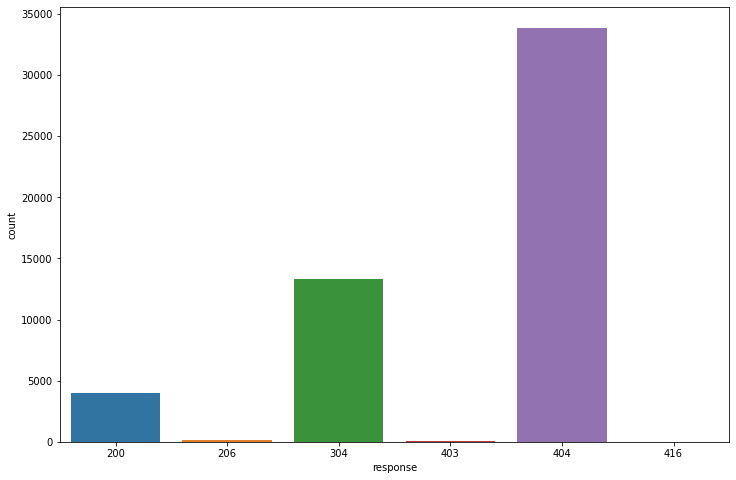

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="response",data=df);

In [ ]:
import pandas as pd

# Örnek veri
date_string = "17/May/2015:08:05:32 +0000"

# Tarih ve saat formatını belirtin
datetime_format = "%d/%b/%Y:%H:%M:%S %z"

# datetime formatına dönüştürün
datetime_obj = pd.to_datetime(date_string, format=datetime_format)

print(datetime_obj)

In [ ]:
from dateutil import parser
import datetime
# Tail from actual nginx access.log
from sys import stdin
        
#lines = [
#  '93.180.71.3 - - [17/May/2015:08:05:32 +0000] "GET /downloads/product_1 HTTP/1.1" 502 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)',
#  '93.180.71.3 - - [17/May/2015:08:05:23 +0000] "GET /downloads/product_1 HTTP/1.1" 304 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)',
#  '80.91.33.133 - - [17/May/2015:08:05:24 +0000] "GET /downloads/product_1 HTTP/1.1" 502 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)',
#  '217.168.17.5 - - [17/May/2015:08:05:34 +0000] "GET /downloads/product_1 HTTP/1.1" 200 490 "-" "Debian APT-HTTP/1.3 (0.8.10.3)',
#  '217.168.17.5 - - [17/May/2015:08:40:09 +0000] "GET /downloads/product_2 HTTP/1.1" 500 490 "-" "Debian APT-HTTP/1.3 (0.8.10.3)' 
#]

lines = [
  '93.180.71.3 - - [17/May/2015:08:05:32 +0000] "GET /downloads/gislaved-ultra-speed-2-215-55-r17-98w-xl-2023 HTTP/1.1" 304 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)',
  '93.180.71.3 - - [17/May/2015:08:05:23 +0000] "request": "GET /downloads/bridgestone-turanza-er300-275-45-r19-109w-2023 HTTP/1.1" 304 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)' 
]

class NginxParser(object):

    MIN = 20
    MAX_NUMBER_OF_ERRORS = 1

    def __init__(self):
        self.status = {}
        self.first_error_time = None
    
    def parse_nginx_log(self, line):

        parts = line.split()
        return_code = parts[8]
        time_stamp = parts[3].replace("[", "")
        date_time = parser.parse(time_stamp, fuzzy=True)

        if return_code.startswith("5"):

          if '500_error' not in self.status:
            self.status['500_error'] = 1
            self.first_error_time = date_time
          else:
            self.status['500_error'] +=1
            if self.status['500_error'] >= self.MAX_NUMBER_OF_ERRORS:
                if date_time - self.first_error_time > datetime.timedelta(minutes=self.MIN):
                  print(self.status)
                  self.status.pop('500_error', None)

    def read_nginx_log(self):
        # can be made to read from sys.stdin
        for line in lines:
           self.parse_nginx_log(line)

if __name__ == '__main__':
    parse = NginxParser()
    parse.read_nginx_log()

In [ ]:
import pandas as pd

# Veri setini DataFrame'e yükle
data = {
    "time": ["2015-05-17 08:05:32", "2015-05-17 08:05:23", "2015-05-17 08:05:24", "2015-05-17 08:05:34", "2015-05-17 08:05:09"],
    "remote_ip": ["93.180.71.3", "93.180.71.3", "80.91.33.133", "217.168.17.5", "217.168.17.5"],
    "request_type": ["GET", "GET", "GET", "GET", "GET"],
    "product_brand": ["gislaved", "bridgestone", "kumho", "bridgestone", "pirelli"],
    "product_model": ["ultra-speed-2-215-55-r17-98w-xl-2023", "turanza-er300-275-45-r19-109w-2023", "ecsta-ps71-215-45-zr18-93y-xl-2022", "turanza-er300-rft-205-55-r16-91w-2023", "scorpion-sealinside-ao-235-45-r21-101t-xl-elec..."],
    "product_year": [2023, 2023, 2022, 2023, 2022],
    "response": [304, 304, 304, 200, 200],
    "bytes": [0, 0, 0, 490, 490],
    "agent": ["Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)", "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)", "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)", "Debian APT-HTTP/1.3 (0.8.10.3)", "Debian APT-HTTP/1.3 (0.8.10.3)"]
}

df = pd.DataFrame(data)

# Başarı oranlarını hesapla
success_rates = df.groupby(['product_brand', 'product_model']).apply(lambda x: (x['response'] == 200).mean()).reset_index(name='success_rate')

# En yüksek başarı oranına sahip olan ürün modelini bul
best_model = success_rates.loc[success_rates['success_rate'].idxmax()]

print("En iyi rota erişim oranı:", best_model['success_rate'])
print("Ürün Markası:", best_model['product_brand'])
print("Ürün Modeli:", best_model['product_model'])